In [1]:
import pandas as pd

In [2]:
BASE_FOLDER = './outputs/evaluation'

In [3]:
def load_data(prefix, traffic):
    df_single_episode = pd.read_csv(f'{BASE_FOLDER}/{prefix}_1_episode_{traffic}.csv')
    df_single_episode = df_single_episode.set_index('step')
    df_single_episode = df_single_episode.drop(columns=['cumulative_reward'])
    
    df_multiple_episodes = pd.read_csv(f'{BASE_FOLDER}/{prefix}_100_episode_{traffic}.csv')
    df_multiple_episodes = df_multiple_episodes.set_index('episode')
    # df_multiple_episodes = df_multiple_episodes.drop(columns=['cumulative_reward'])
    return df_single_episode, df_multiple_episodes

In [4]:
df_single_episode_forced, df_multiple_episodes_forced = load_data('oc_forced_500k_steps', 'custom-2way-single-intersection')

<Axes: xlabel='step'>

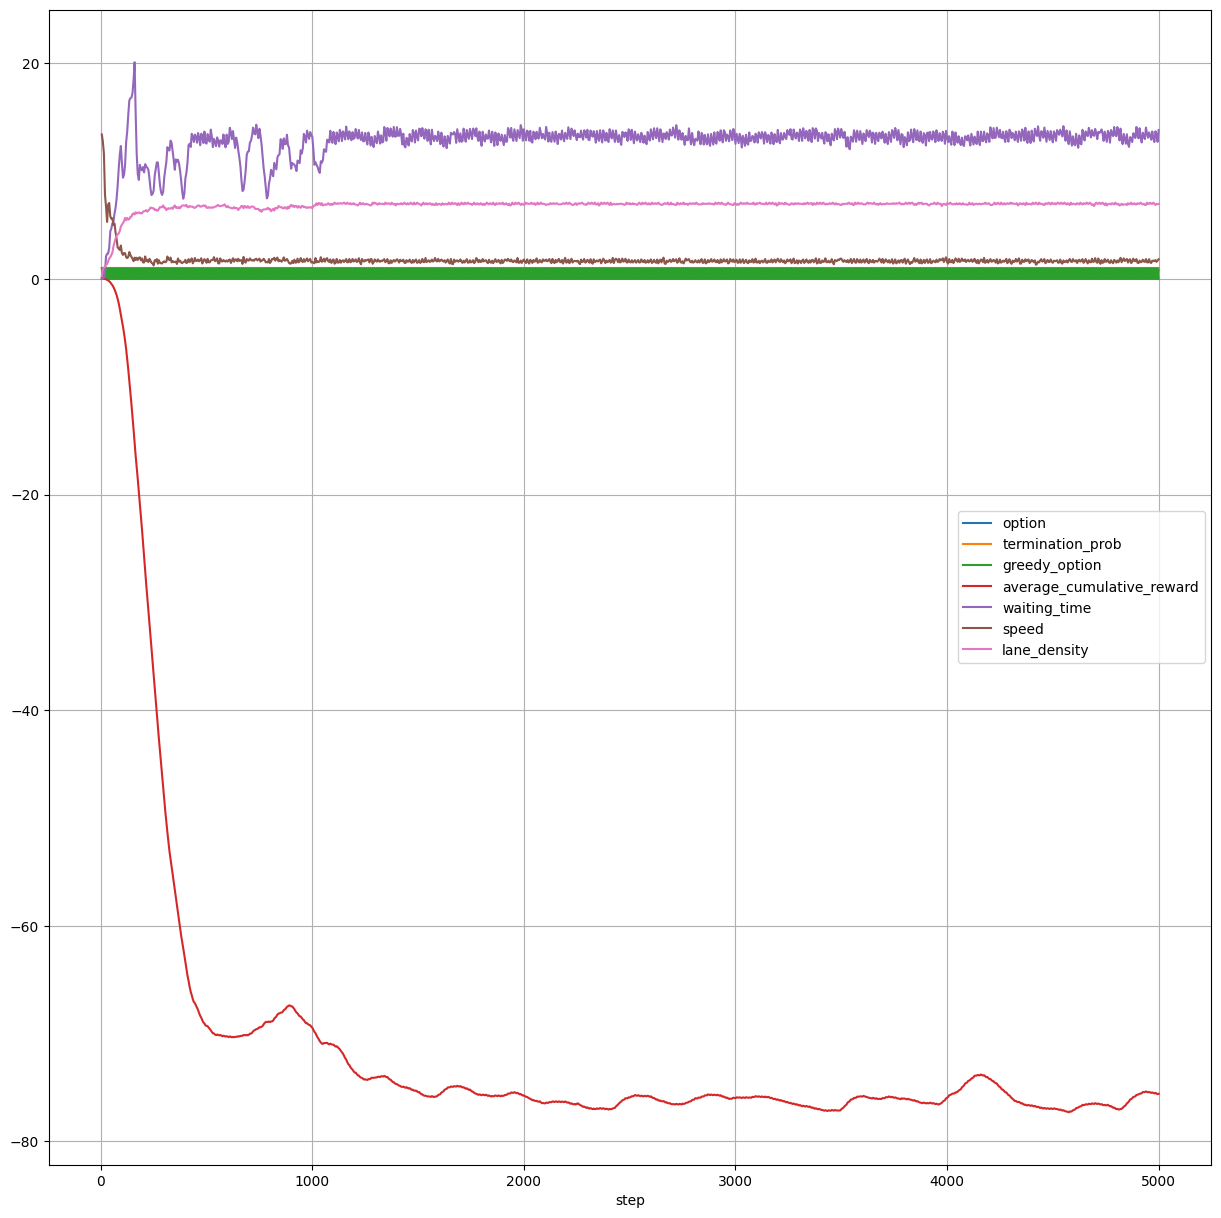

In [5]:
df_single_episode_forced.plot(grid=True, figsize=(15,15))

<Axes: xlabel='step'>

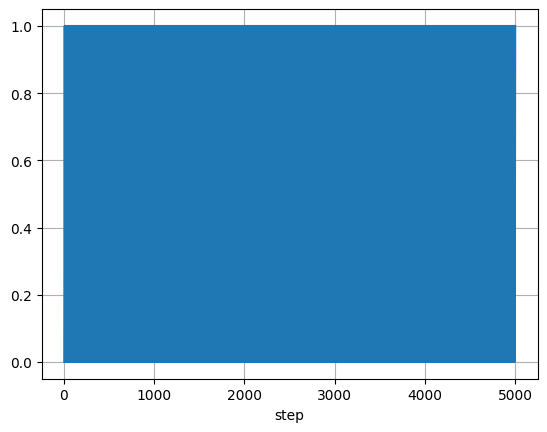

In [6]:
df_single_episode_forced.option.plot(grid=True)

<Axes: xlabel='episode'>

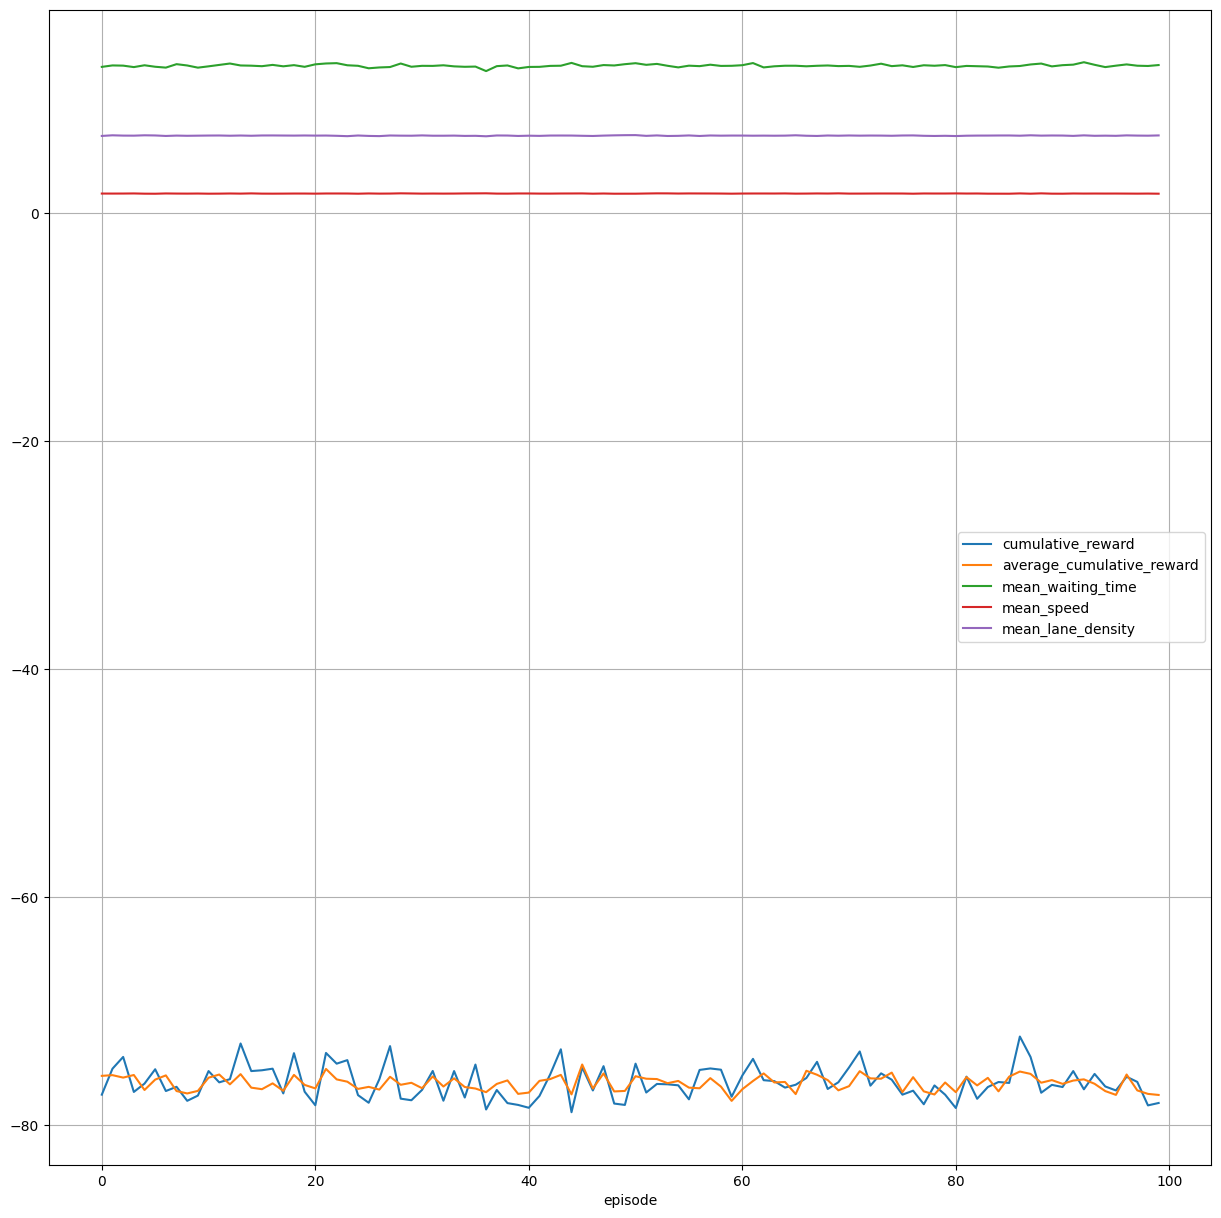

In [12]:
df_multiple_episodes_forced.plot(grid=True, figsize=(15,15))

In [8]:
df_single_episode_oc, df_multiple_episodes_oc = load_data('oc_2way_500k_steps', 'custom-2way-single-intersection')

<Axes: xlabel='step'>

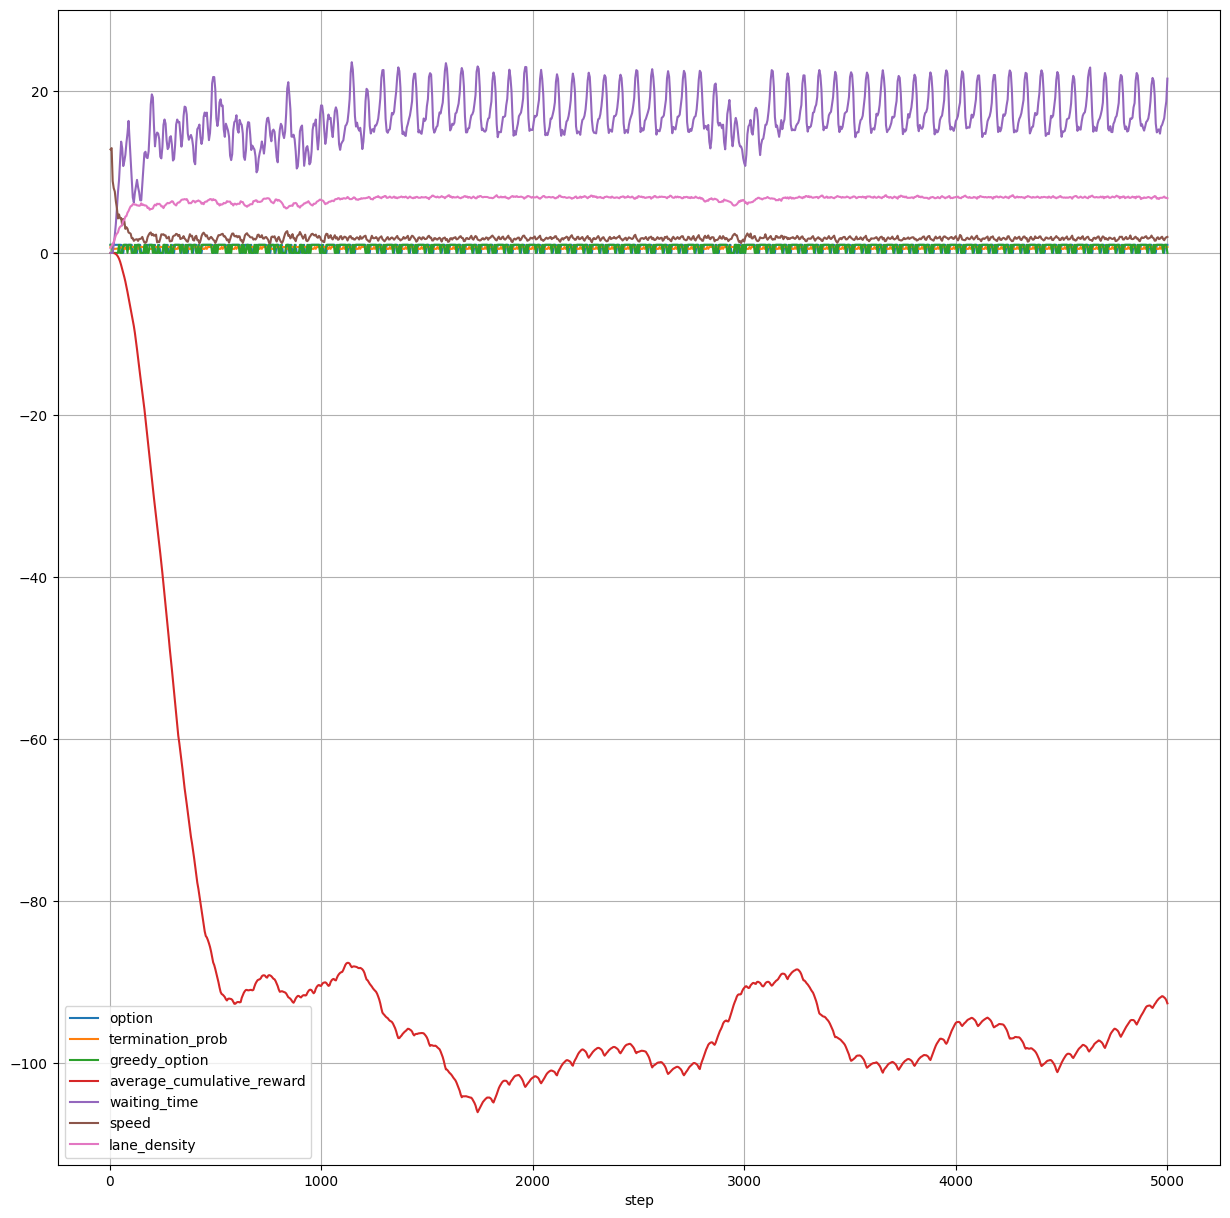

In [10]:
df_single_episode_oc.plot(grid=True, figsize=(15,15))

In [7]:
# Verify that the metrics are stable across multiple episodes

<Axes: xlabel='episode'>

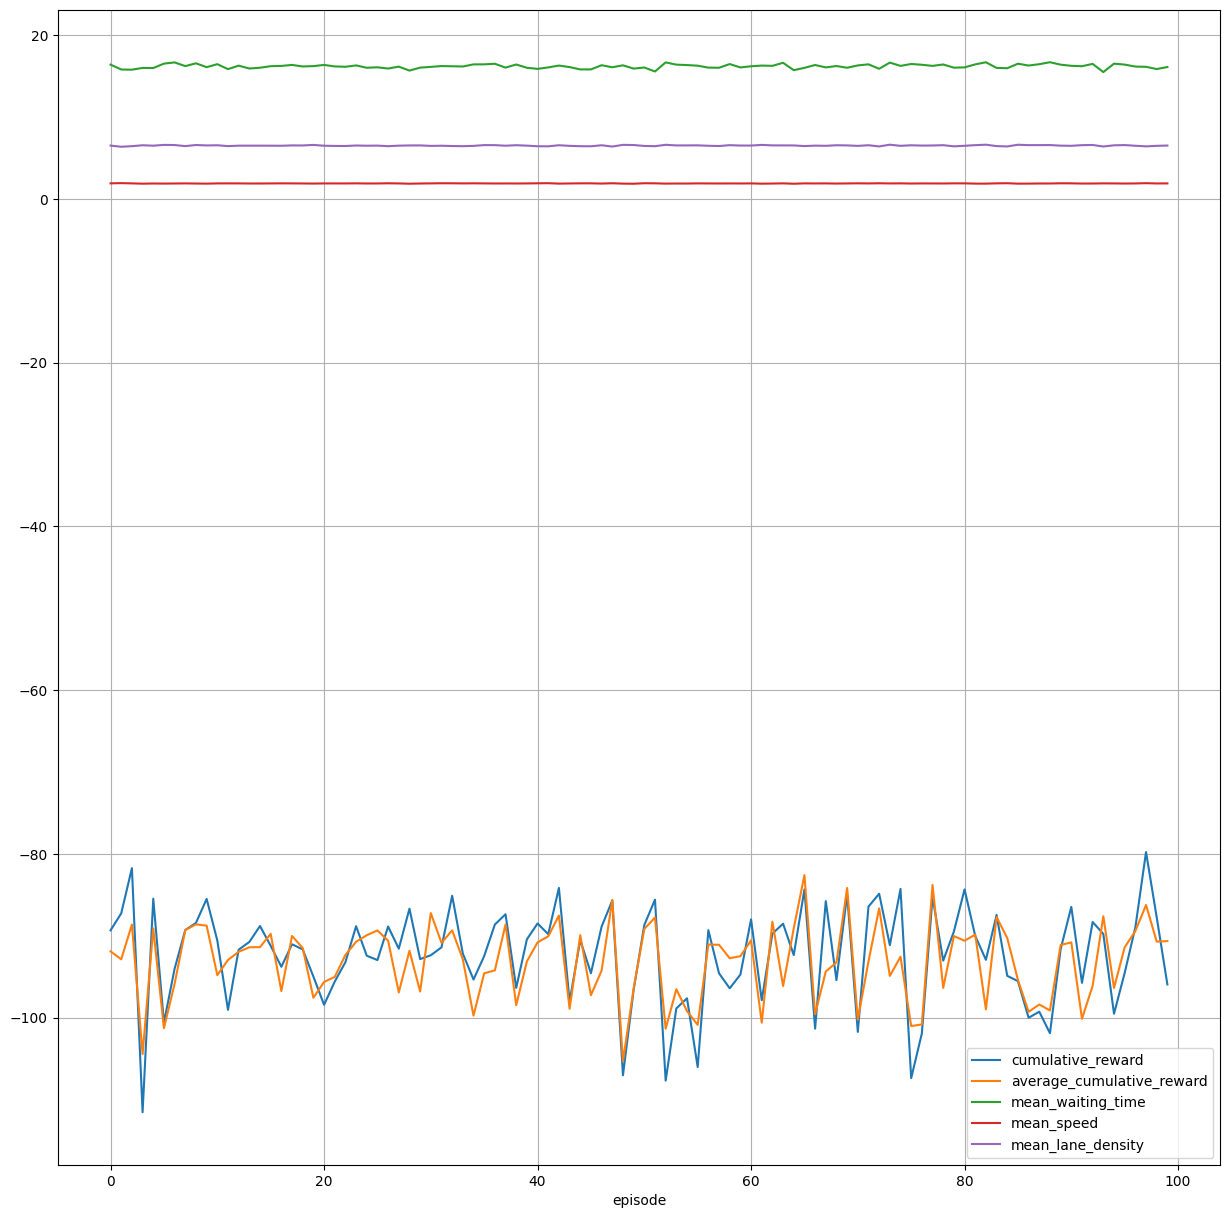

In [11]:
df_multiple_episodes_oc.plot(grid=True, figsize=(15,15))

In [14]:
df_multiple_episodes_forced[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -76.238700
mean_lane_density     6.815741
dtype: float64

In [13]:
df_multiple_episodes_oc[['cumulative_reward', 'mean_lane_density']].mean()

cumulative_reward   -92.334200
mean_lane_density     6.526162
dtype: float64